In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Import citipy
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [66]:
cities

['norman wells',
 'arraial do cabo',
 'amapa',
 'albany',
 'waitati',
 'kodiak',
 'le port',
 'lompoc',
 'illoqqortoormiut',
 'muhos',
 'georgetown',
 'ust-nera',
 'pevek',
 'hermanus',
 'bluff',
 'yumen',
 'avarua',
 'mar del plata',
 'san cristobal',
 'vostok',
 'ribeira grande',
 'tromso',
 'carnarvon',
 'lolua',
 'ewa beach',
 'wajima',
 'srednekolymsk',
 'esperance',
 'east london',
 'bengkulu',
 'upernavik',
 'victoria',
 'husavik',
 'punta arenas',
 'constitucion',
 'itarema',
 'grand river south east',
 'vaini',
 'bilibino',
 'saint george',
 'torbay',
 'atar',
 'teya',
 'taolanaro',
 'tasiilaq',
 'katsuura',
 'ahumada',
 'hamilton',
 'cape town',
 'mount isa',
 'ushuaia',
 'busselton',
 'jardim',
 'kristiinankaupunki',
 'mataura',
 'yuli',
 'bathsheba',
 'sao filipe',
 'hilo',
 'takestan',
 'khatanga',
 'butaritari',
 'aswan',
 'follebu',
 'lagawe',
 'sabang',
 'harsin',
 'nelson bay',
 'tutoia',
 'saint-leu',
 'narsaq',
 'saskylakh',
 'cockburn harbour',
 'port alfred',
 'bar

In [10]:
# Import the dependencies.
import requests
from config import weather_api_key


In [15]:
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key


In [16]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [87]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities[:50]):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        print(city_weather)
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
        
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | norman wells
{'coord': {'lon': -126.8329, 'lat': 65.282}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -7.56, 'feels_like': -7.56, 'temp_min': -7.56, 'temp_max': -7.56, 'pressure': 1027, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 1648102756, 'sys': {'type': 1, 'id': 951, 'country': 'CA', 'sunrise': 1648131128, 'sunset': 1648176889}, 'timezone': -21600, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}
Processing Record 2 of Set 1 | arraial do cabo
{'coord': {'lon': -42.0278, 'lat': -22.9661}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 74.77, 'feels_like': 75.76, 'temp_min': 74.77, 'temp_max': 74.77, 'pressure': 1015, 'humidity': 81, 'sea_level': 1015, 'grnd_level': 1013}, 'visi

{'coord': {'lon': 97.2, 'lat': 40.2833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.92, 'feels_like': 37.09, 'temp_min': 44.92, 'temp_max': 44.92, 'pressure': 1013, 'humidity': 24, 'sea_level': 1013, 'grnd_level': 851}, 'visibility': 10000, 'wind': {'speed': 19.28, 'deg': 88, 'gust': 18.12}, 'clouds': {'all': 89}, 'dt': 1648103059, 'sys': {'country': 'CN', 'sunrise': 1648078128, 'sunset': 1648122377}, 'timezone': 28800, 'id': 1528998, 'name': 'Yumen', 'cod': 200}
Processing Record 17 of Set 1 | avarua
{'coord': {'lon': -159.775, 'lat': -21.2078}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.65, 'feels_like': 86.18, 'temp_min': 80.65, 'temp_max': 80.65, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 60}, 'clouds': {'all': 75}, 'dt': 1648103059, 'sys': {'type': 1, 'id': 7271

In [88]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.2820,-126.8329,-7.56,77,40,0.00,CA,2022-03-24 06:19:16
1,Arraial Do Cabo,-22.9661,-42.0278,74.77,81,6,17.56,BR,2022-03-24 06:19:44
2,Amapa,1.0000,-52.0000,72.18,100,100,2.01,BR,2022-03-24 06:19:45
3,Albany,42.6001,-73.9662,37.02,87,100,5.99,US,2022-03-24 06:15:10
4,Waitati,-45.7500,170.5667,58.80,70,97,7.58,NZ,2022-03-24 06:19:46
5,Kodiak,57.7900,-152.4072,27.91,86,0,3.44,US,2022-03-24 06:19:47
6,Le Port,-20.9373,55.2919,85.96,64,93,4.88,RE,2022-03-24 06:19:47
7,Lompoc,34.6391,-120.4579,55.54,96,100,3.44,US,2022-03-24 06:19:48
8,Muhos,64.8080,25.9931,37.89,94,87,7.45,FI,2022-03-24 06:24:15
9,Georgetown,5.4112,100.3354,89.55,66,20,8.05,MY,2022-03-24 06:20:56


In [89]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Norman Wells,CA,2022-03-24 06:19:16,65.2820,-126.8329,-7.56,77,40,0.00
1,Arraial Do Cabo,BR,2022-03-24 06:19:44,-22.9661,-42.0278,74.77,81,6,17.56
2,Amapa,BR,2022-03-24 06:19:45,1.0000,-52.0000,72.18,100,100,2.01
3,Albany,US,2022-03-24 06:15:10,42.6001,-73.9662,37.02,87,100,5.99
4,Waitati,NZ,2022-03-24 06:19:46,-45.7500,170.5667,58.80,70,97,7.58
5,Kodiak,US,2022-03-24 06:19:47,57.7900,-152.4072,27.91,86,0,3.44
6,Le Port,RE,2022-03-24 06:19:47,-20.9373,55.2919,85.96,64,93,4.88
7,Lompoc,US,2022-03-24 06:19:48,34.6391,-120.4579,55.54,96,100,3.44
8,Muhos,FI,2022-03-24 06:24:15,64.8080,25.9931,37.89,94,87,7.45
9,Georgetown,MY,2022-03-24 06:20:56,5.4112,100.3354,89.55,66,20,8.05


In [90]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [91]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [92]:
max_temps

0     -7.56
1     74.77
2     72.18
3     37.02
4     58.80
5     27.91
6     85.96
7     55.54
8     37.89
9     89.55
10    12.49
11    18.61
12    64.80
13    57.54
14    44.92
15    80.65
16    69.10
17    65.75
18    34.97
19    59.67
20    32.02
21    89.67
22    76.98
Name: Max Temp, dtype: float64

In [93]:
lats.value_counts()

 65.2820    1
-34.4187    1
-24.8667    1
 69.6496    1
 38.5167    1
 46.4856    1
 7.7669     1
-38.0023    1
-21.2078    1
 40.2833    1
-46.6000    1
 69.7008    1
-22.9661    1
 64.5667    1
 5.4112     1
 64.8080    1
 34.6391    1
-20.9373    1
 57.7900    1
-45.7500    1
 42.6001    1
 1.0000     1
 21.3156    1
Name: Lat, dtype: int64

In [94]:
max_temps.value_counts()

-7.56     1
 64.80    1
 89.67    1
 32.02    1
 59.67    1
 34.97    1
 65.75    1
 69.10    1
 80.65    1
 44.92    1
 57.54    1
 18.61    1
 74.77    1
 12.49    1
 89.55    1
 37.89    1
 55.54    1
 85.96    1
 27.91    1
 58.80    1
 37.02    1
 72.18    1
 76.98    1
Name: Max Temp, dtype: int64

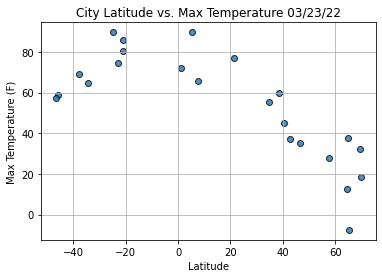

In [96]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

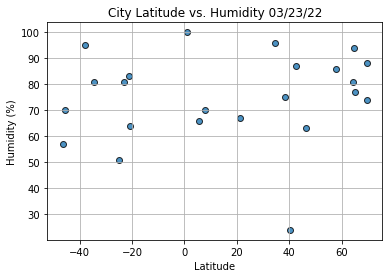

In [97]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

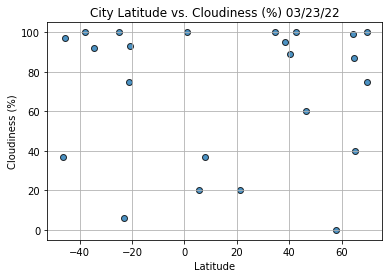

In [98]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

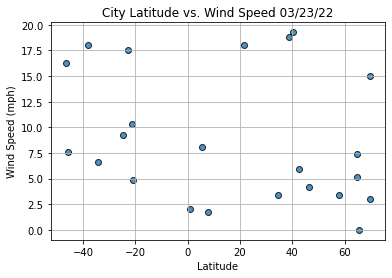

In [99]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [100]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Norman Wells,CA,2022-03-24 06:19:16,65.2820,-126.8329,-7.56,77,40,0.00
1,Arraial Do Cabo,BR,2022-03-24 06:19:44,-22.9661,-42.0278,74.77,81,6,17.56
2,Amapa,BR,2022-03-24 06:19:45,1.0000,-52.0000,72.18,100,100,2.01
3,Albany,US,2022-03-24 06:15:10,42.6001,-73.9662,37.02,87,100,5.99
4,Waitati,NZ,2022-03-24 06:19:46,-45.7500,170.5667,58.80,70,97,7.58
5,Kodiak,US,2022-03-24 06:19:47,57.7900,-152.4072,27.91,86,0,3.44
6,Le Port,RE,2022-03-24 06:19:47,-20.9373,55.2919,85.96,64,93,4.88
7,Lompoc,US,2022-03-24 06:19:48,34.6391,-120.4579,55.54,96,100,3.44
8,Muhos,FI,2022-03-24 06:24:15,64.8080,25.9931,37.89,94,87,7.45
9,Georgetown,MY,2022-03-24 06:20:56,5.4112,100.3354,89.55,66,20,8.05
